<a href="https://colab.research.google.com/github/BenRyan-8/DataAcquisition_CA/blob/main/Artworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Acquisition CA
###Merging existing data about artworks from the Met Museum with newly scraped information from the Met Website

##Section 1 — Importing & Processing the Dataset

Importing the met museums dataset from Github (Too large to download from [Kaggle](https://www.kaggle.com/datasets/metmuseum/the-metropolitan-museum-of-art-open-access))

In [191]:
!git lfs clone https://github.com/metmuseum/openaccess

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
fatal: destination path 'openaccess' already exists and is not an empty directory.
Error(s) during clone:
git clone failed: exit status 128


Loading the MetObjects.csv dataset which contains nearly 500k rows

In [192]:
%cd
import pandas as pd

met = pd.read_csv('/content/openaccess/MetObjects.csv', low_memory=False)
met.shape

/root


(484956, 54)

Inspecting dataset structure to identify useful fields.

In [193]:
met.columns.tolist()

['Object Number',
 'Is Highlight',
 'Is Timeline Work',
 'Is Public Domain',
 'Object ID',
 'Gallery Number',
 'Department',
 'AccessionYear',
 'Object Name',
 'Title',
 'Culture',
 'Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Constituent ID',
 'Artist Role',
 'Artist Prefix',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Suffix',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Artist Gender',
 'Artist ULAN URL',
 'Artist Wikidata URL',
 'Object Date',
 'Object Begin Date',
 'Object End Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Classification',
 'Rights and Reproduction',
 'Link Resource',
 'Object Wikidata URL',
 'Metadata Date',
 'Repository',
 'Tags',
 'Tags AAT URL',
 'Tags Wikidata URL']

Relevant fields to be used as a foundation of exploration:

1. **ObjectID** - This will operate as a primary key when looking to scrape more data.
2. **Title** - The official title or name of the artwork as recorded by the museum.
3. **Artist Display Name** - The full public-facing name of the artist who created the artwork.
4. **Artist Nationality** - The country in which the artist resided throughout their career.
4. **Object Date** -The date or date range associated with when the artwork was created.
5. **Department** - What department do we want to focus on?


Identifying all department values and choosing 'European Paintings' to reduce the scope of the project.

In [194]:
met['Department'].unique()

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

In [195]:
met = met[met['Department']== 'European Paintings']
met.reset_index(drop=True, inplace=True)

met['Department'].unique()

array(['European Paintings'], dtype=object)

Identifying completely empty columns

In [196]:
empty_cols = met.columns[met.isna().all()].tolist()
print(empty_cols)

['Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Metadata Date']


In [197]:
#Dropping empty columns
met.drop(columns=empty_cols, inplace=True)
met.columns[met.isna().all()].tolist()

[]

Inspecting remaining columns and how much data is missing through the use of a heatmap.

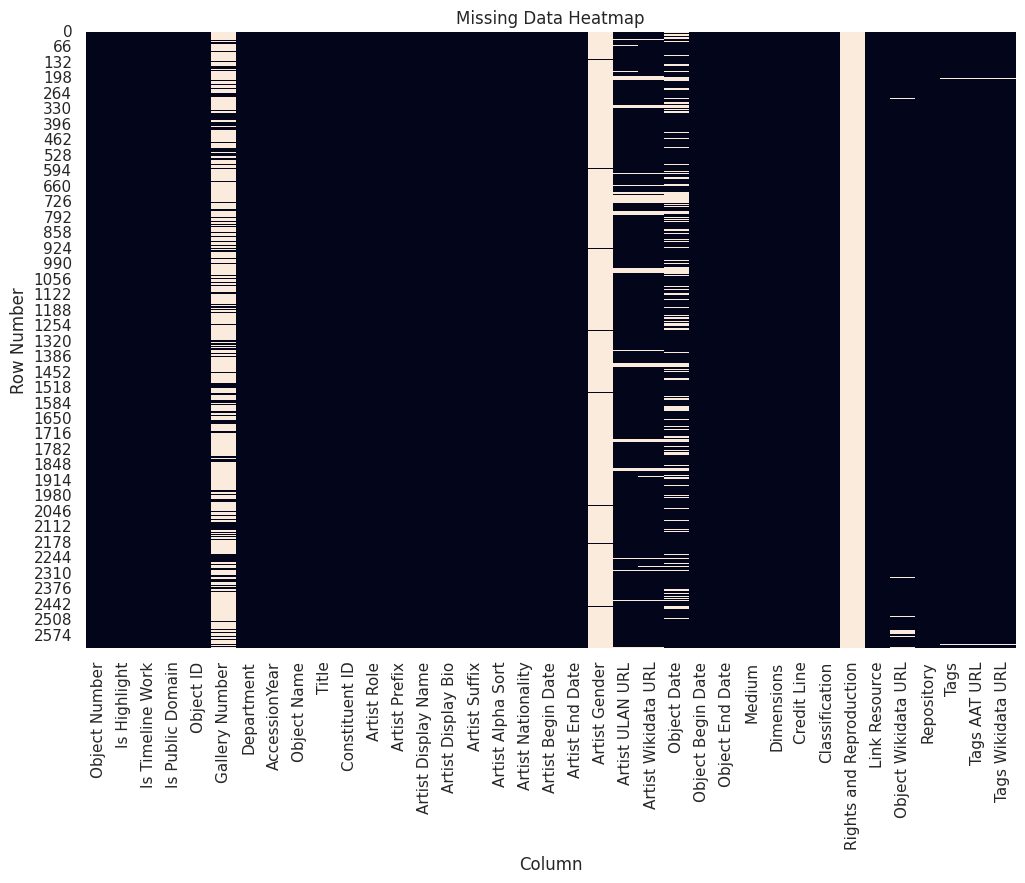

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.heatmap(met.isna(), cbar=False)
plt.title('Missing Data Heatmap')
plt.xlabel('Column')
plt.ylabel('Row Number')
plt.show()


Columns with information that is not deemed useful (metadata, rights, external URL's) or contains mainly missing values in this section of the data.

In [199]:
columns_to_be_dropped = [
    'Is Highlight',
    'Is Timeline Work',
    'Is Public Domain',
    'Rights and Reproduction',
    'Artist ULAN URL',
    'Artist Wikidata URL',
    'Tags AAT URL',
    'Link Resource',
    'Repository',
    'Object Wikidata URL',
    'Object Date',
    'Tags Wikidata URL',
    'Artist Gender',
    'Gallery Number']

met.drop(columns = columns_to_be_dropped, inplace = True)

In [200]:
met.head()

,Object Number,Object ID,Department,AccessionYear,Object Name,Title,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Tags
0,13.130,435570,European Paintings,1913,"Painting, miniature",A Ship in a Stormy Sea,10729,Artist,,Ivan Konstantinovich Aivazovsky (Hovhannes Aiv...,...,"Armenian, born Russian Empire [now Ukraine]",1817,1900,1837,1900,Card,1 x 2 in. (26 x 53 mm),"Gift of Isabel F. Hapgood, 1913",Miniatures,Seas|Storms|Ships
1,76.10,435572,European Paintings,1876,"Painting, part of an altarpiece",Saint Giles with Christ Triumphant over Satan ...,10730,Artist,,Miguel Alcañiz (or Miquel Alcanyís),...,Spanish,1408,1447,1403,1413,"Tempera on wood, gold ground",Overall 59 5/8 x 39 1/2 in. (151.4 x 100.3 cm)...,"Gift of J. Bruyn Andrews, 1876",Paintings,Apostles|Saints|Christ
2,1985.5,435573,European Paintings,1985,Painting,Flora and Zephyr,16159,Artist,,Jacopo Amigoni,...,Italian,1682,1752,1730,1739,Oil on canvas,84 x 58 in. (213.4 x 147.3 cm),"Purchase, Rudolph and Lentilhon G. von Fluegge...",Paintings,Goddess|Putti|Flowers|Landscapes
3,12.6,435574,European Paintings,1912,"Painting, predella panel",The Crucifixion,16601,Artist,,Andrea di Bartolo,...,Italian,1389,1428,1389,1428,"Tempera on wood, gold ground",20 3/4 x 38 1/2 in. (52.7 x 97.8 cm),"Rogers Fund, 1912",Paintings,Soldiers|Men|Crucifixion|Horses|Mountains|Ange...
4,42.53.2,435575,European Paintings,1942,"Painting, miniature","Jérôme Bonaparte (1784–1860), King of Westphalia",10864,Artist,,Giacomo Andreoli,...,Italian,1808,1808,1803,1813,Ivory,2 3/8 x 1 7/8 in. (60 x 48 mm),"Gift of Helen O. Brice, 1942",Miniatures,Kings|Men|Portraits


##SECTION 2 — Web Scraping Additional MET Data

Collecting additional data directly from each artwork's online MET Museum page, including image URLs, on-view display status, and the overview text of the artwork. These attributes are not available in the original dataset and can be seen in the below image.

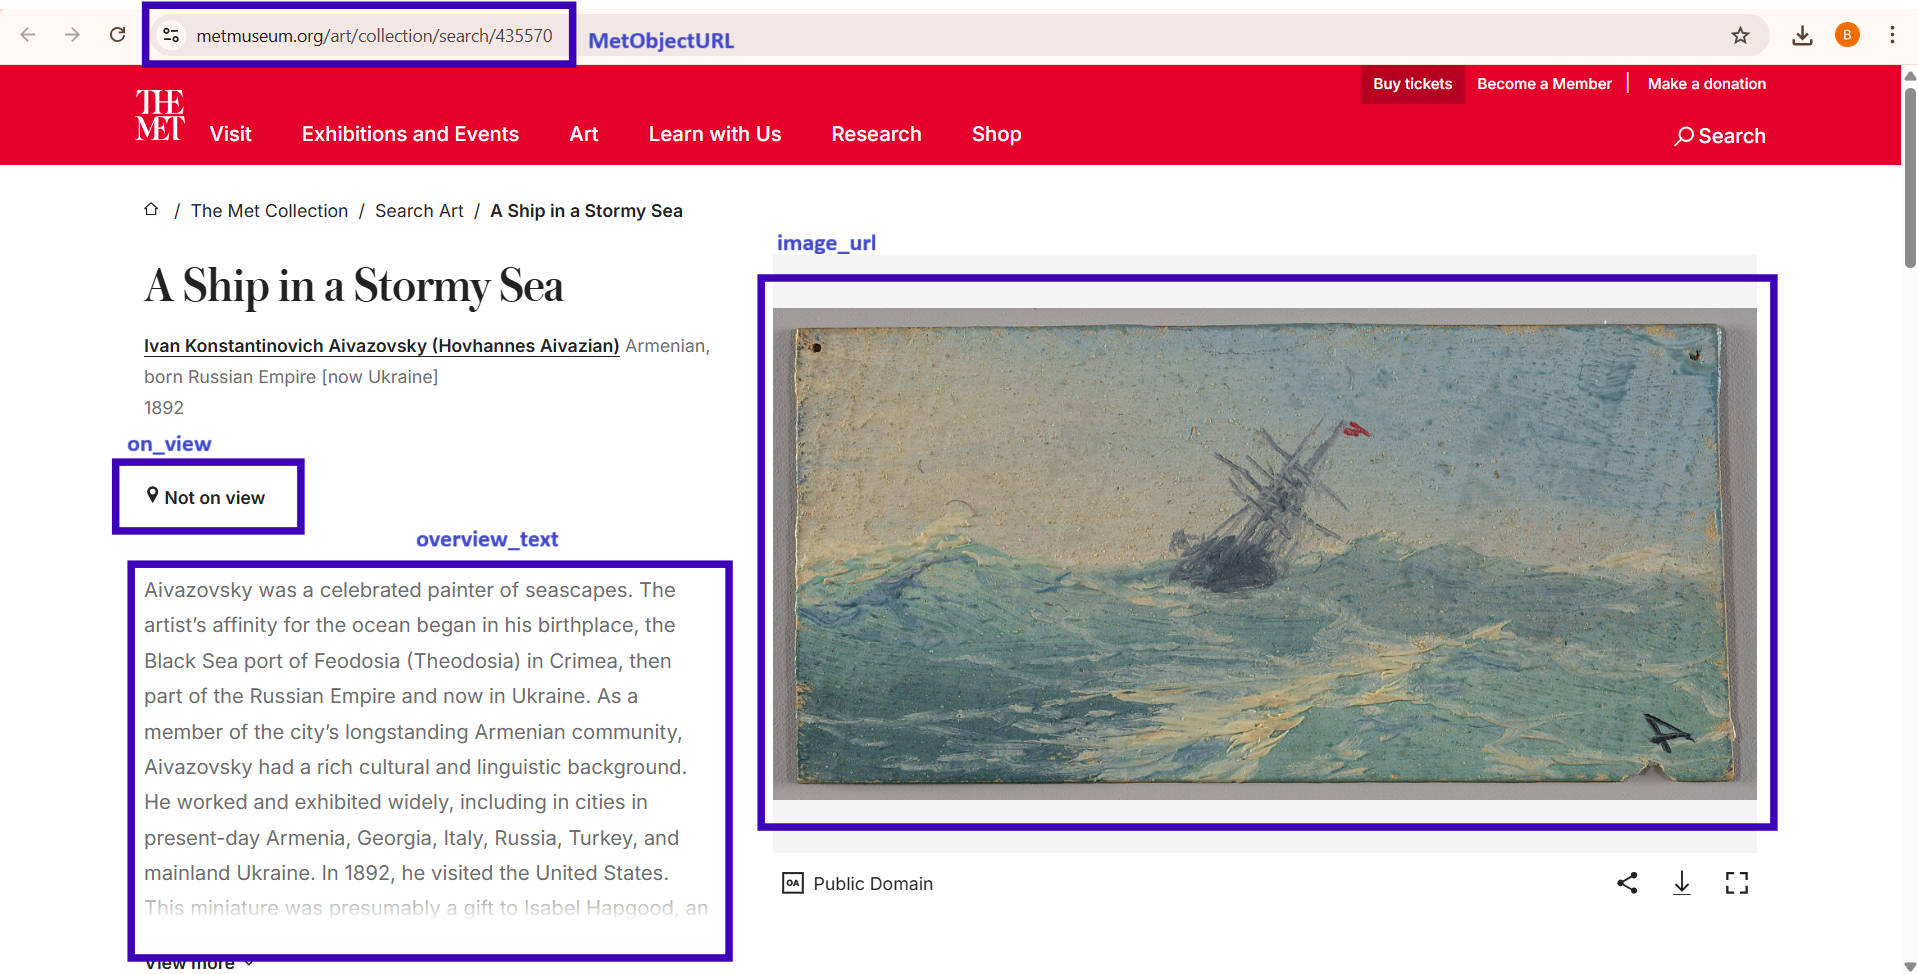

Fields to add:

* metObjectURL
* image_url
* on_view (True/False)
* overview_text



###MetObjectURL

In [201]:
#Builds direct URLs for each artwork’s online page
BASE = "https://www.metmuseum.org/art/collection/search/"
met['MetObjectURL'] = BASE + met['Object ID'].astype(str)


In [202]:
#Verifying the new links work
for i in met['MetObjectURL'][:3]:
  print(i)

https://www.metmuseum.org/art/collection/search/435570
https://www.metmuseum.org/art/collection/search/435572
https://www.metmuseum.org/art/collection/search/435573


###Scraping image URLs, display status, and overview text

---



In [203]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import time
from tqdm import tqdm

def scrape_met_objects(url_series, delay=0.0, verbose=True):

    image_urls = []
    on_views = []
    overview_texts = []

    for url in tqdm(url_series, desc="Scraping MET pages"):

        try:
            # Build request with browser headers
            request = urllib.request.Request(url)
            request.add_header("User-Agent", "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36")
            opener = urllib.request.build_opener()
            response = opener.open(request)

            html = response.read().decode("utf-8", errors="replace")

            soup = BeautifulSoup(html, "lxml")

            # 1. IMAGE URL
            image_tag = soup.find("meta", {"property": "og:image"})
            image_urls.append(image_tag.get("content") if image_tag else None)

            # 2. ON VIEW STATUS
            text = soup.get_text(" ", strip=True)

            if "Not on view" in text:
                on_views.append(False)
            elif "On view at" in text:
                on_views.append(True)
            else:
                on_views.append(None)

            # 3. OVERVIEW TEXT
            overview_div = soup.select_one("div[class*='object-overview_label']")
            overview_texts.append(overview_div.get_text(" ", strip=True) if overview_div else None)

        except Exception as e:
            # Fail gracefully
            image_urls.append(None)
            on_views.append(None)
            overview_texts.append(None)

        time.sleep(delay)

    return pd.DataFrame({
        "MetObjectURL": url_series,
        "image_url": image_urls,
        "on_view": on_views,
        "overview_text": overview_texts
    })


In [204]:
#Inputting the column of URL's to be scraped into the function
scraped = scrape_met_objects(met['MetObjectURL'])


Scraping MET pages: 100%|██████████| 2626/2626 [09:41<00:00,  4.52it/s]


##SECTION 3 — Merging the Datasets

Scraped data is returned as the dataframe 'scraped' allowing for an easy merge to the original dataframe

In [205]:
met=met.merge(scraped, on='MetObjectURL', how='left')

In [206]:
#Verifying new columns have been added
met.columns.tolist()

['Object Number',
 'Object ID',
 'Department',
 'AccessionYear',
 'Object Name',
 'Title',
 'Constituent ID',
 'Artist Role',
 'Artist Prefix',
 'Artist Display Name',
 'Artist Display Bio',
 'Artist Suffix',
 'Artist Alpha Sort',
 'Artist Nationality',
 'Artist Begin Date',
 'Artist End Date',
 'Object Begin Date',
 'Object End Date',
 'Medium',
 'Dimensions',
 'Credit Line',
 'Classification',
 'Tags',
 'MetObjectURL',
 'image_url',
 'on_view',
 'overview_text']

##SECTION 4 — Exploratory Data Analysis & Visualisation

This section will explore aspects of the original dataset followed by visualisations of the data utilising the newly scraped data.

####Distribution of Artwork Completion Dates

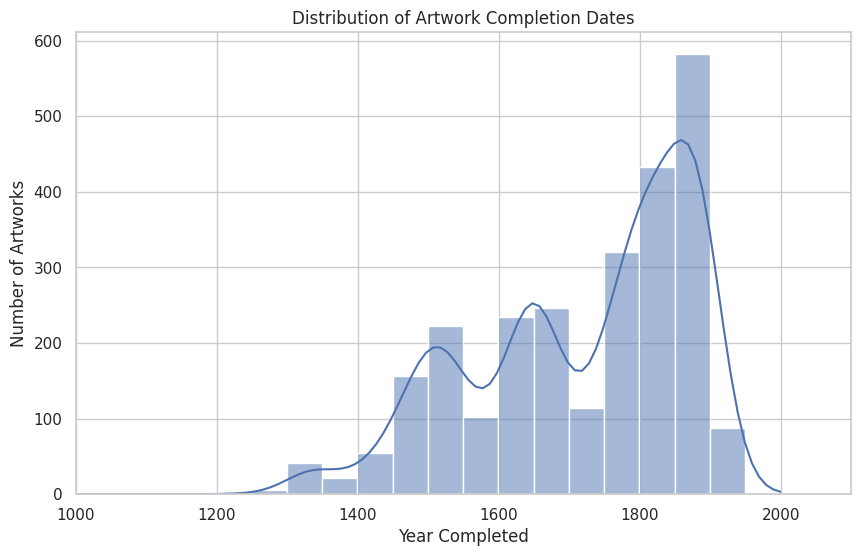

In [207]:
#Displays the spread of the collection and highlights the period with the most European Paintings.
plt.figure(figsize=(10,6))
sns.histplot(data=met, x='Object End Date', bins=40, kde=True)
plt.title('Distribution of Artwork Completion Dates')
plt.xlabel('Year Completed')
plt.ylabel('Number of Artworks')
plt.xlim(1000, None)
plt.show()

####Top 20 Artists by Number of Works

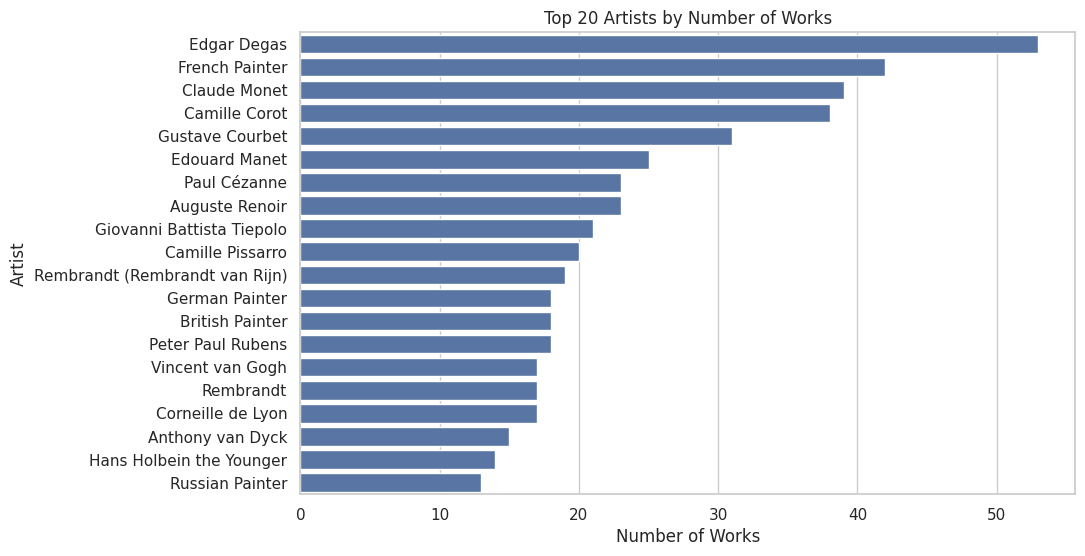

In [208]:
#Identifies which artists dominate the museum’s holdings
top_artists = met['Artist Display Name'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 20 Artists by Number of Works')
plt.xlabel('Number of Works')
plt.ylabel('Artist')
plt.show()


####Top Artist Nationalities

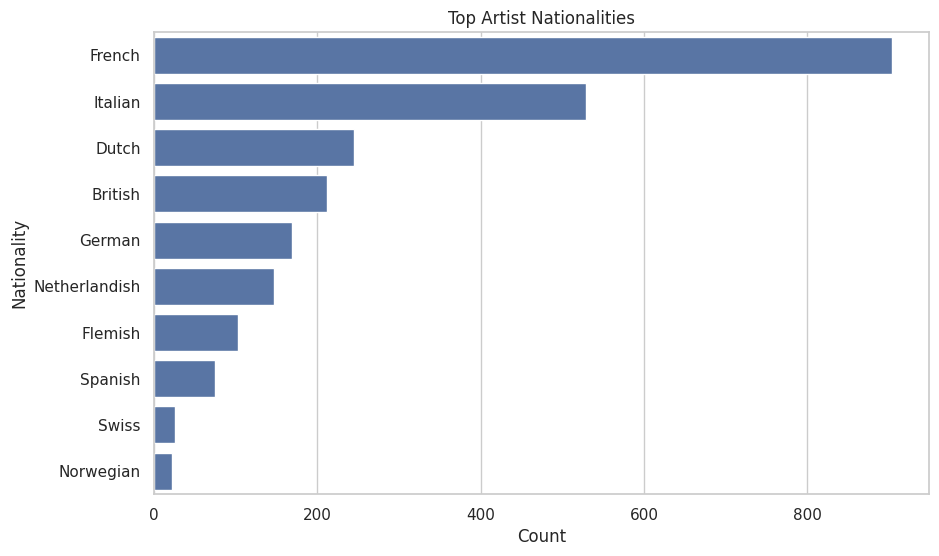

In [209]:
#Summary of the most represented regions in the European Paintings collection
plt.figure(figsize=(10,6))
sns.countplot(
    data=met,
    y='Artist Nationality',
    order=met['Artist Nationality'].value_counts().head(10).index
)
plt.title('Top Artist Nationalities')
plt.ylabel('Nationality')
plt.xlabel('Count')
plt.show()


### Visualisations Using Newly Scraped Data

####On-View at the Museum Distribution

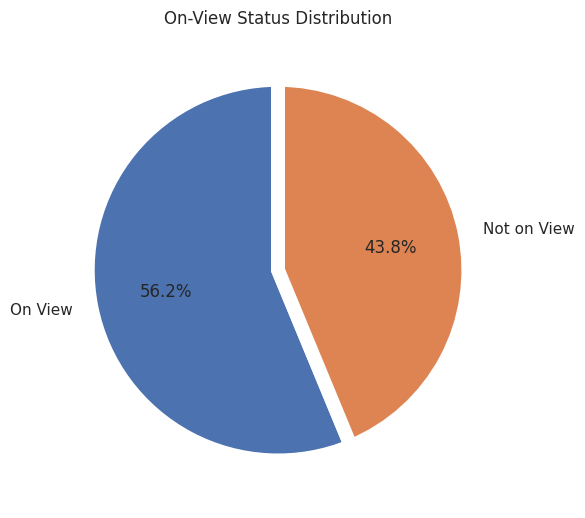

In [210]:
# Count values
counts = met['on_view'].value_counts()
labels = ['On View', 'Not on View']

plt.figure(figsize=(6,6))

plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 10}
)

plt.title('On-View Status Distribution')
plt.tight_layout()
plt.show()


####Artwork Dates by On-View Status
Are artworks from a certain period more likely to be on display? (i.e. newer paintings on view)

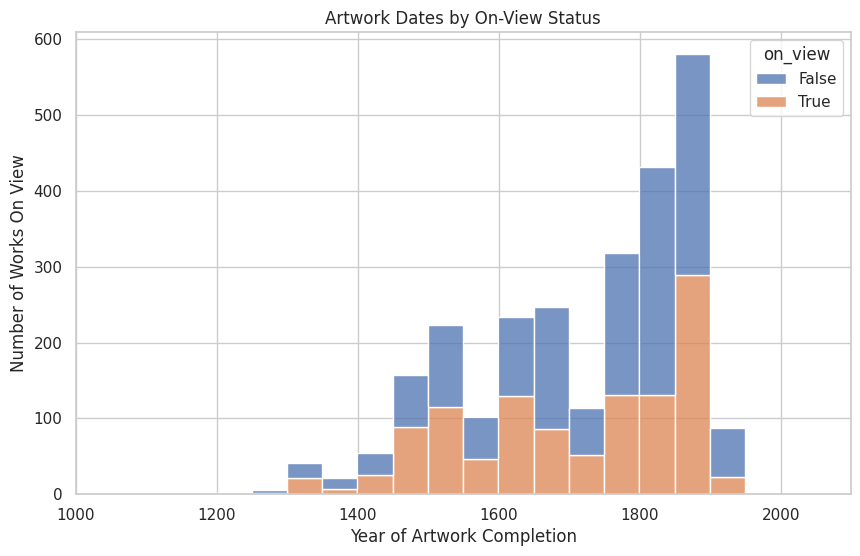

In [217]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=met[met['on_view'].notna()], #filter out na values
    x='Object End Date',
    hue='on_view',
    bins=40,
    multiple='stack'
)
plt.title('Artwork Dates by On-View Status')
plt.xlabel('Year of Artwork Completion')
plt.ylabel('Number of Works On View')
plt.xlim(1000, None)
plt.show()

####Top 10 Artists with Works Currently On View
Which artists have the most painting on view?

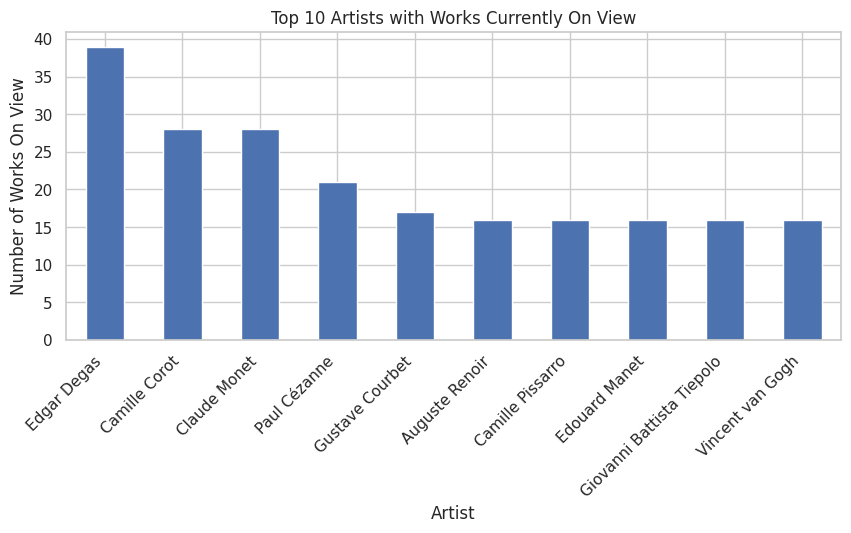

In [218]:
top_artists = (
    met[met['on_view'] == True]['Artist Display Name']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,4))
top_artists.plot(kind='bar')
plt.title("Top 10 Artists with Works Currently On View")
plt.xlabel("Artist")
plt.ylabel("Number of Works On View")
plt.xticks(rotation=45, ha='right')
plt.show()


####On-View Status by Artist Nationality
Are certain nationalities more likely to have their work on view?

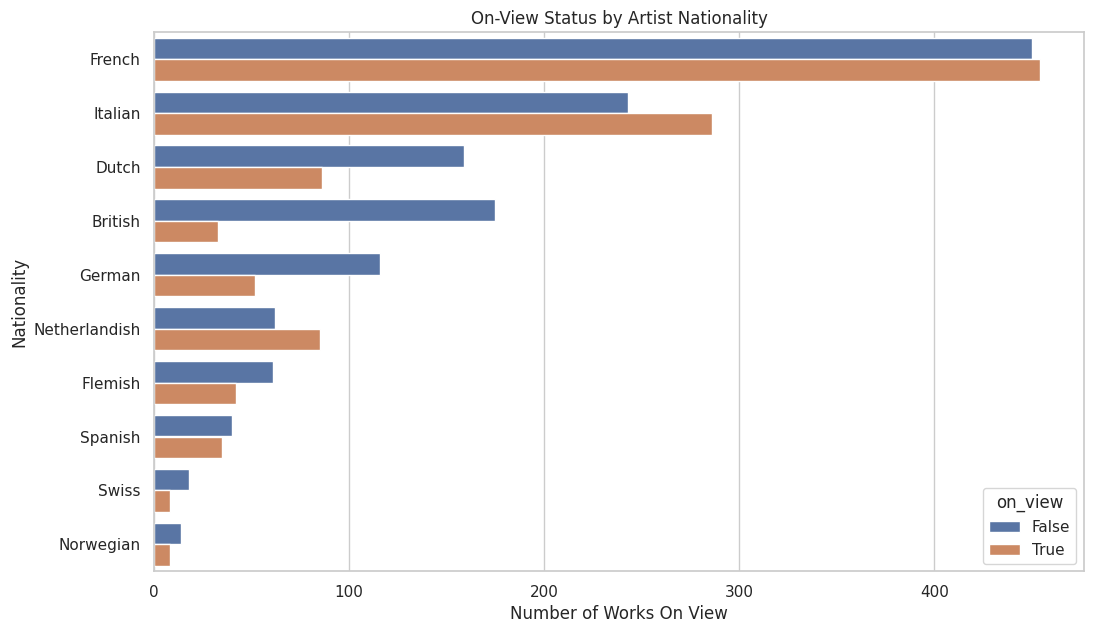

In [220]:
top_nat = met['Artist Nationality'].value_counts().head(10).index
subset = met[met['Artist Nationality'].isin(top_nat)]

plt.figure(figsize=(12,7))
sns.countplot(
    data=subset[subset['on_view'].notna()], # Filter out None values from 'on_view'
    y='Artist Nationality',
    hue='on_view',
    order=top_nat
)
plt.title('On-View Status by Artist Nationality')
plt.xlabel('Number of Works On View')
plt.ylabel('Nationality')
plt.show()

####World Cloud of Overview Text

What words are most seen in the overview of a painting?

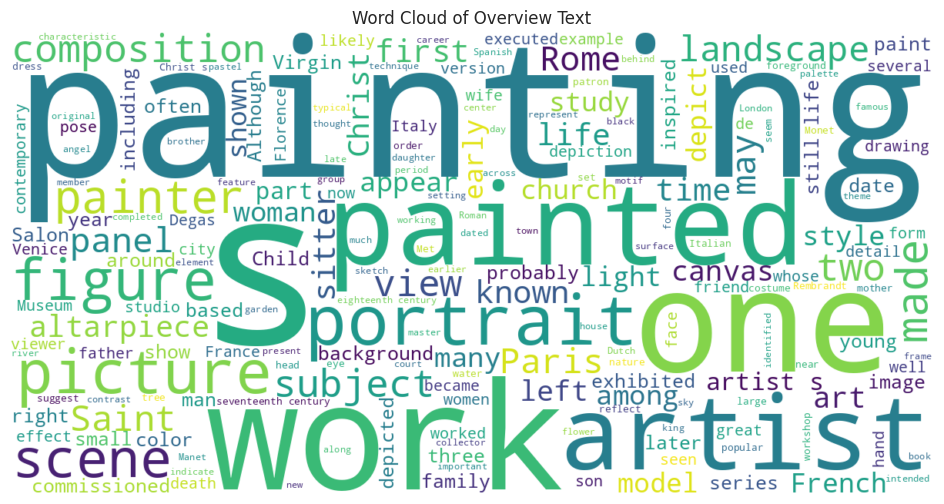

In [221]:
from wordcloud import WordCloud

text = " ".join(met['overview_text'].dropna())

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Overview Text")
plt.show()



The visualisations in this project help show important patterns in artist backgrounds, dates, and themes within the European Paintings collection. The extra data that was scraped, especially the on view status, made it possible to see which artworks are actually visible to the public and added insights that were not available in the original dataset.